In [3]:
import numpy as np # linear algebra
import pandas as pd

Read the data

In [4]:
train=pd.read_csv('~/Documents/kaggle_competitions/pulmonary_fibrosis_progression/train.csv')
#train2=pd.read_csv(basepath + 'train.csv')

In [5]:
train.head()


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


The data describes the time-varying behavior of chronic patients. The patiens are differentiated according to sex (Male, Female), the age (0-100), if they are smokers or not. Thus, we need to see how we can create predictors that could provide us with prediction power. We can first plot the data to see how the importn variable, i.e. FVC differs according to the patient's characteristics.

The distribution of the minimum values of FVC is plotted below. We can see that the values span within a very broad range which denotes that we need to dive more on tte data to understand how we need to construct effective predictors.

The next figure provides the FVC time-series of all the patients.

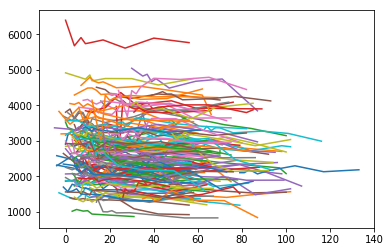

In [12]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
for key, grp in train.groupby(['Patient']): 
    ax1.plot(grp['Weeks'], grp['FVC']) #, label = "Patient in {0:02d}".format(key))
#plt.legend(loc='best')    
plt.show()

What is interesting from plotting the time-varying behavior of all the patients is that for some of them we can observe a smooth dynamical behavior. The term smooth can be defined as the tendency of the patients to reach a steady state after some examinations. Therefore, it is important to construct variables that show how the different examinations differ for each patient.

In what follows, I provide some figures to compare this time-varying behavior among the patients and among the different groups in term of the age, the sex and the smoking habits.

The first plot compares the first vs the last FVC of each patient.

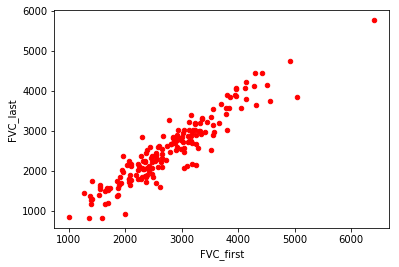

In [14]:
find_first_measurement_per_patient=train.loc[train.groupby("Patient")["Weeks"].idxmin()]

find_last_measurement_per_patient=train.loc[train.groupby("Patient")["Weeks"].idxmax()]

find_first_measurement_per_patient.columns=['Patient', 'Weeks', 'FVC_first', 'Percent_first', 'Age', 'Sex', 'SmokingStatus']

find_last_measurement_per_patient.columns=['Patient', 'Weeks', 'FVC_last', 'Percent_last', 'Age', 'Sex', 'SmokingStatus']

merge_data_frames=pd.merge(find_first_measurement_per_patient, find_last_measurement_per_patient,
                           left_on='Patient', right_on='Patient', how='inner')

merge_data_frames['difference:last-first_FVC']=merge_data_frames['FVC_first']-merge_data_frames['FVC_last']
merge_data_frames['difference:last-first_Percent']=merge_data_frames['Percent_first']-merge_data_frames['Percent_last']

merge_data_frames.plot(kind='scatter',x='FVC_first',y='FVC_last',color='red')
plt.show()

Where we can observe a perfect correlation between the first and the last measurement. Thus, we should strongly expect that the first FVC should be an indication of what we expect to observe in the last examination.

In what follows, I go deeper into the data to check the difference between the last and the first measurement for the different patient groups.

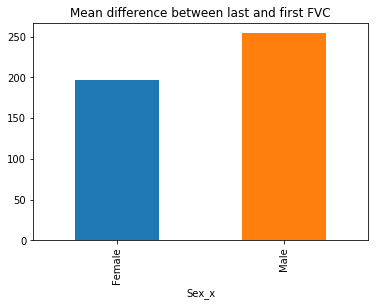

In [15]:
difference_sex_plot=merge_data_frames.groupby("Sex_x")['difference:last-first_FVC'].mean().plot(kind='bar', title="Mean difference between last and first FVC")


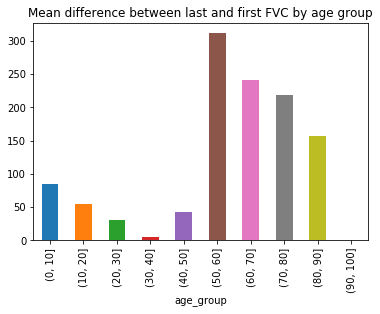

In [16]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
merge_data_frames['age_group'] = pd.cut(merge_data_frames['Age_x'], bins)
merge_data_frames['age_group'].value_counts().plot(kind='bar')

merge_data_frames.groupby("age_group")['difference:last-first_FVC'].mean().plot(kind='bar',
                         title="Mean difference between last and first FVC by age group")